# Basic Neural Network - IRIS dataset

### Packages Included

In [5]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

from torch.autograd import Variable

#### Custom Dataset

In [7]:
# Download data folder
from data import iris

### Creating Module

In [8]:
# Module Defined :

class IrisNet(nn.Module):
    
    def __init__(self, input_size, hidden1_size, hidden2_size, num_classes):
        
        super(IrisNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden1_size)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden1_size, hidden2_size)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden2_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        return out

In [9]:
model = IrisNet(4, 100, 50, 3)
print(model)

IrisNet(
  (fc1): Linear(in_features=4, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=50, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=50, out_features=3, bias=True)
)


In [10]:
batch_size = 60
iris_data_file = 'data/iris.data.txt'

#### Separating Training & Testing Dataset

In [11]:
train_ds, test_ds = iris.get_datasets(iris_data_file)

# How many instances have we got?
print('# instances in training set: ', len(train_ds))
print('# instances in testing/validation set: ', len(test_ds))

# Create the dataloaders - for training and validation/testing
# We will be using the term validation and testing data interchangably
train_loader = torch.utils.data.DataLoader(dataset=train_ds, batch_size=batch_size, shuffle=True)
test_loader  = torch.utils.data.DataLoader(dataset=test_ds, batch_size=batch_size, shuffle=True)

# instances in training set:  120
# instances in testing/validation set:  30


### Loss function + Optimizer

In [12]:
# Our model
net = IrisNet(4, 100, 50, 3).cuda()

# Our loss function
criterion = nn.CrossEntropyLoss()

# Our optimizer
learning_rate = 0.001
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, nesterov=True, momentum=0.9, dampening=0)

### Training Starts

In [13]:
num_epochs = 500

train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []

for epoch in range(num_epochs):
    
    train_correct = 0
    train_total = 0
    
    for i, (items, classes) in enumerate(train_loader):
        
        # Convert torch tensor to Variable
        items = Variable(items.cuda())
        classes = Variable(classes).cuda().long()
      
        
        net.train()           # Put the network into training mode
        
        optimizer.zero_grad() # Clear off the gradients from any past operation
        outputs = net(items)  # Do the forward pass
        loss = criterion(outputs, classes) # Calculate the loss
        loss.backward()       # Calculate the gradients with help of back propagation
        optimizer.step()      # Ask the optimizer to adjust the parameters based on the gradients
        
        # Record the correct predictions for training data
        train_total += classes.size(0)    
        _, predicted = torch.max(outputs.data, 1)
        train_correct += (predicted == classes.data).sum()

        print ('Epoch %d/%d, Iteration %d/%d, Loss: %.4f' 
               %(epoch+1, num_epochs, i+1, len(train_ds)//batch_size, loss.data[0]))

    net.eval()                 # Put the network into evaluation mode
    
    # Book keeping
    # Record the loss
    train_loss.append(loss.data[0])

    # What was our train accuracy?
    train_accuracy.append((100 * train_correct / train_total))
    
    # How did we do on the test set (the unseen set)
    # Record the correct predictions for test data
    test_items = torch.FloatTensor(test_ds.data.values[:, 0:4])
    test_classes = torch.LongTensor(test_ds.data.values[:, 4])

    outputs = net(Variable(test_items).cuda())
    loss = criterion(outputs, Variable(test_classes).cuda())
    test_loss.append(loss.data[0])
    _, predicted = torch.max(outputs.data, 1)
    total = test_classes.size(0)
    correct = (predicted == test_classes.cuda()).sum()
    test_accuracy.append((100 * correct / total))


c:\users\rahul aggarwal\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:40: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
c:\users\rahul aggarwal\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:46: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
c:\users\rahul aggarwal\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:58: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch 1/500, Iteration 1/2, Loss: 1.1283
Epoch 1/500, Iteration 2/2, Loss: 1.1205
Epoch 2/500, Iteration 1/2, Loss: 1.0882
Epoch 2/500, Iteration 2/2, Loss: 1.1307
Epoch 3/500, Iteration 1/2, Loss: 1.0324
Epoch 3/500, Iteration 2/2, Loss: 1.1488
Epoch 4/500, Iteration 1/2, Loss: 1.0771
Epoch 4/500, Iteration 2/2, Loss: 1.0641
Epoch 5/500, Iteration 1/2, Loss: 1.0723
Epoch 5/500, Iteration 2/2, Loss: 1.0297
Epoch 6/500, Iteration 1/2, Loss: 1.0436
Epoch 6/500, Iteration 2/2, Loss: 1.0183
Epoch 7/500, Iteration 1/2, Loss: 1.0340
Epoch 7/500, Iteration 2/2, Loss: 0.9981
Epoch 8/500, Iteration 1/2, Loss: 1.0149
Epoch 8/500, Iteration 2/2, Loss: 0.9872
Epoch 9/500, Iteration 1/2, Loss: 0.9832
Epoch 9/500, Iteration 2/2, Loss: 0.9939
Epoch 10/500, Iteration 1/2, Loss: 0.9697
Epoch 10/500, Iteration 2/2, Loss: 0.9843
Epoch 11/500, Iteration 1/2, Loss: 0.9599
Epoch 11/500, Iteration 2/2, Loss: 0.9682
Epoch 12/500, Iteration 1/2, Loss: 0.9513
Epoch 12/500, Iteration 2/2, Loss: 0.9512
Epoch 13/5

Epoch 99/500, Iteration 2/2, Loss: 0.3610
Epoch 100/500, Iteration 1/2, Loss: 0.4076
Epoch 100/500, Iteration 2/2, Loss: 0.3462
Epoch 101/500, Iteration 1/2, Loss: 0.3404
Epoch 101/500, Iteration 2/2, Loss: 0.4083
Epoch 102/500, Iteration 1/2, Loss: 0.4000
Epoch 102/500, Iteration 2/2, Loss: 0.3441
Epoch 103/500, Iteration 1/2, Loss: 0.3462
Epoch 103/500, Iteration 2/2, Loss: 0.3937
Epoch 104/500, Iteration 1/2, Loss: 0.3741
Epoch 104/500, Iteration 2/2, Loss: 0.3617
Epoch 105/500, Iteration 1/2, Loss: 0.3855
Epoch 105/500, Iteration 2/2, Loss: 0.3458
Epoch 106/500, Iteration 1/2, Loss: 0.3876
Epoch 106/500, Iteration 2/2, Loss: 0.3395
Epoch 107/500, Iteration 1/2, Loss: 0.3859
Epoch 107/500, Iteration 2/2, Loss: 0.3379
Epoch 108/500, Iteration 1/2, Loss: 0.3611
Epoch 108/500, Iteration 2/2, Loss: 0.3578
Epoch 109/500, Iteration 1/2, Loss: 0.3386
Epoch 109/500, Iteration 2/2, Loss: 0.3764
Epoch 110/500, Iteration 1/2, Loss: 0.3172
Epoch 110/500, Iteration 2/2, Loss: 0.3939
Epoch 111/50

Epoch 200/500, Iteration 2/2, Loss: 0.2211
Epoch 201/500, Iteration 1/2, Loss: 0.2162
Epoch 201/500, Iteration 2/2, Loss: 0.2100
Epoch 202/500, Iteration 1/2, Loss: 0.1772
Epoch 202/500, Iteration 2/2, Loss: 0.2467
Epoch 203/500, Iteration 1/2, Loss: 0.2024
Epoch 203/500, Iteration 2/2, Loss: 0.2193
Epoch 204/500, Iteration 1/2, Loss: 0.2029
Epoch 204/500, Iteration 2/2, Loss: 0.2176
Epoch 205/500, Iteration 1/2, Loss: 0.1727
Epoch 205/500, Iteration 2/2, Loss: 0.2445
Epoch 206/500, Iteration 1/2, Loss: 0.2264
Epoch 206/500, Iteration 2/2, Loss: 0.1909
Epoch 207/500, Iteration 1/2, Loss: 0.2407
Epoch 207/500, Iteration 2/2, Loss: 0.1724
Epoch 208/500, Iteration 1/2, Loss: 0.1862
Epoch 208/500, Iteration 2/2, Loss: 0.2246
Epoch 209/500, Iteration 1/2, Loss: 0.2199
Epoch 209/500, Iteration 2/2, Loss: 0.1893
Epoch 210/500, Iteration 1/2, Loss: 0.2091
Epoch 210/500, Iteration 2/2, Loss: 0.1975
Epoch 211/500, Iteration 1/2, Loss: 0.1853
Epoch 211/500, Iteration 2/2, Loss: 0.2196
Epoch 212/5

Epoch 300/500, Iteration 2/2, Loss: 0.1311
Epoch 301/500, Iteration 1/2, Loss: 0.1595
Epoch 301/500, Iteration 2/2, Loss: 0.1175
Epoch 302/500, Iteration 1/2, Loss: 0.1684
Epoch 302/500, Iteration 2/2, Loss: 0.1069
Epoch 303/500, Iteration 1/2, Loss: 0.1183
Epoch 303/500, Iteration 2/2, Loss: 0.1557
Epoch 304/500, Iteration 1/2, Loss: 0.1354
Epoch 304/500, Iteration 2/2, Loss: 0.1386
Epoch 305/500, Iteration 1/2, Loss: 0.1374
Epoch 305/500, Iteration 2/2, Loss: 0.1366
Epoch 306/500, Iteration 1/2, Loss: 0.1416
Epoch 306/500, Iteration 2/2, Loss: 0.1297
Epoch 307/500, Iteration 1/2, Loss: 0.1407
Epoch 307/500, Iteration 2/2, Loss: 0.1302
Epoch 308/500, Iteration 1/2, Loss: 0.1510
Epoch 308/500, Iteration 2/2, Loss: 0.1192
Epoch 309/500, Iteration 1/2, Loss: 0.1328
Epoch 309/500, Iteration 2/2, Loss: 0.1380
Epoch 310/500, Iteration 1/2, Loss: 0.0988
Epoch 310/500, Iteration 2/2, Loss: 0.1708
Epoch 311/500, Iteration 1/2, Loss: 0.1197
Epoch 311/500, Iteration 2/2, Loss: 0.1479
Epoch 312/5

Epoch 398/500, Iteration 2/2, Loss: 0.1451
Epoch 399/500, Iteration 1/2, Loss: 0.0774
Epoch 399/500, Iteration 2/2, Loss: 0.1352
Epoch 400/500, Iteration 1/2, Loss: 0.0929
Epoch 400/500, Iteration 2/2, Loss: 0.1191
Epoch 401/500, Iteration 1/2, Loss: 0.1350
Epoch 401/500, Iteration 2/2, Loss: 0.0818
Epoch 402/500, Iteration 1/2, Loss: 0.0961
Epoch 402/500, Iteration 2/2, Loss: 0.1156
Epoch 403/500, Iteration 1/2, Loss: 0.1274
Epoch 403/500, Iteration 2/2, Loss: 0.0838
Epoch 404/500, Iteration 1/2, Loss: 0.0744
Epoch 404/500, Iteration 2/2, Loss: 0.1377
Epoch 405/500, Iteration 1/2, Loss: 0.0841
Epoch 405/500, Iteration 2/2, Loss: 0.1271
Epoch 406/500, Iteration 1/2, Loss: 0.1352
Epoch 406/500, Iteration 2/2, Loss: 0.0769
Epoch 407/500, Iteration 1/2, Loss: 0.1040
Epoch 407/500, Iteration 2/2, Loss: 0.1056
Epoch 408/500, Iteration 1/2, Loss: 0.1099
Epoch 408/500, Iteration 2/2, Loss: 0.0988
Epoch 409/500, Iteration 1/2, Loss: 0.1230
Epoch 409/500, Iteration 2/2, Loss: 0.0852
Epoch 410/5

Epoch 495/500, Iteration 1/2, Loss: 0.0924
Epoch 495/500, Iteration 2/2, Loss: 0.0891
Epoch 496/500, Iteration 1/2, Loss: 0.0827
Epoch 496/500, Iteration 2/2, Loss: 0.0990
Epoch 497/500, Iteration 1/2, Loss: 0.0523
Epoch 497/500, Iteration 2/2, Loss: 0.1285
Epoch 498/500, Iteration 1/2, Loss: 0.0857
Epoch 498/500, Iteration 2/2, Loss: 0.0953
Epoch 499/500, Iteration 1/2, Loss: 0.1281
Epoch 499/500, Iteration 2/2, Loss: 0.0522
Epoch 500/500, Iteration 1/2, Loss: 0.0887
Epoch 500/500, Iteration 2/2, Loss: 0.0916


### Training vs Testing Loss

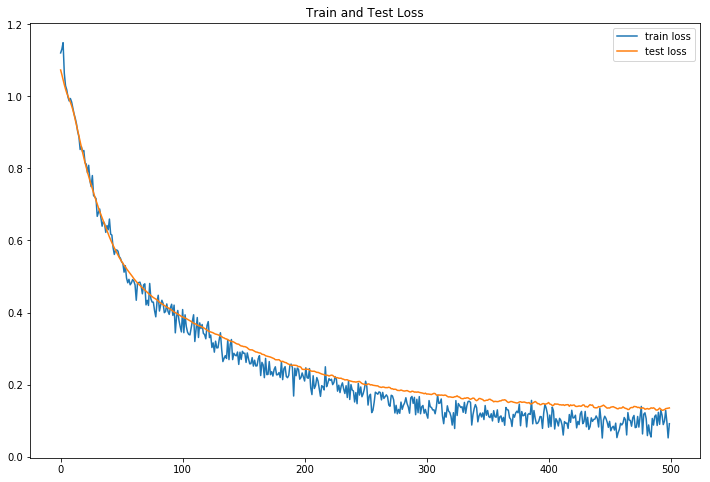

In [14]:
fig = plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='train loss')
plt.plot(test_loss, label='test loss')
plt.title("Train and Test Loss")
plt.legend()
plt.show()

### Training vs Testing Accuracy

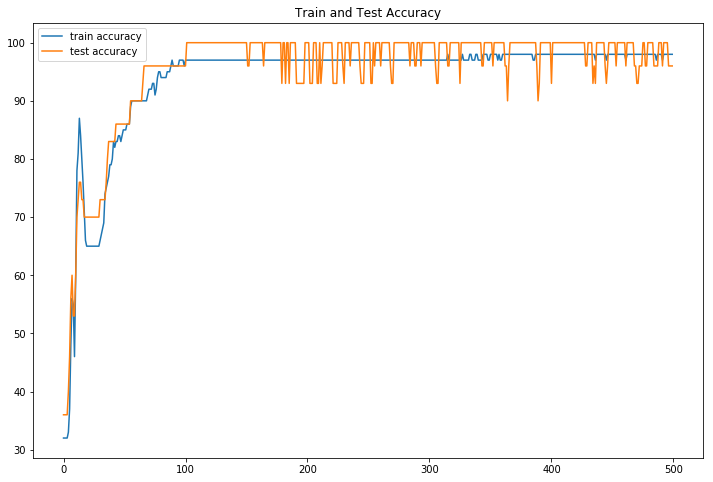

In [15]:

fig = plt.figure(figsize=(12, 8))
plt.plot(train_accuracy, label='train accuracy')
plt.plot(test_accuracy, label='test accuracy')
plt.title("Train and Test Accuracy")
plt.legend()
plt.show()

### Savign the model to disk, and loading it back

In [16]:
torch.save(net.state_dict(), "./2.model.pth")

In [17]:
net2 = IrisNet(4, 100, 50, 3)
net2.load_state_dict(torch.load("./2.model.pth"))

In [40]:
output = net2(Variable(torch.FloatTensor([[5.1, 3.5, 1.4, 0.2]])))

In [41]:
_, predicted_class = torch.max(output.data, 1)
print('Predicted class: ', predicted_class.numpy()[0])
print('Expected class: ', 0 )

Predicted class:  0
Expected class:  0
